# Demo No. 8 - Accessing config parameters inside your script

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from astropy import units as u

from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from elisa.observer.observer import Observer

All parameters available in configuration file (see. https://github.com/mikecokina/elisa/blob/master/src/elisa/conf/elisa_conf_docs.ini) can be set as well inside the script. Lets now use this capability to investigate the effect of different limb darkening laws on the shape of the light curve. The config can be accesed using following import:

In [2]:
from elisa.conf import config

In case of the limb darkening, there are 3 limb darkening laws available: `linear` or `cosine`, `logarithmic` or `square_root`:

In [3]:
available_ld_laws = ['linear', 'logarithmic', 'square_root']

Lets define our test binary system and observer class, on which we will investigate the efffect of the limb darkening:

In [4]:
primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=3,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.5,
    synchronicity=1.0,
    t_eff=6000 * u.K,
    gravity_darkening=1.0,
    albedo=0.6,
    metallicity=0,
)

binary_system = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=80 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

observer = Observer(passband=['Generic.Bessell.V'], system=binary_system)

2020-01-23 09:22:48,550 - 3743 - binary_system.system - INFO: initialising object BinarySystem
2020-01-23 09:22:48,586 - 3743 - binary_system.system - INFO: setting discretization factor of secondary component to 5.11 as a according to discretization factor of the primary component andconfiguration boundaries
2020-01-23 09:22:48,586 - 3743 - observer.observer - INFO: initialising Observer instance


All configuration file parameters can be accessed as an attribute of the `config` object in capitalised form. Here we can use this capability to investigate the efffect of the limb darkening (you may need to zoom the figure in order to see the differences):

<IPython.core.display.Javascript object>


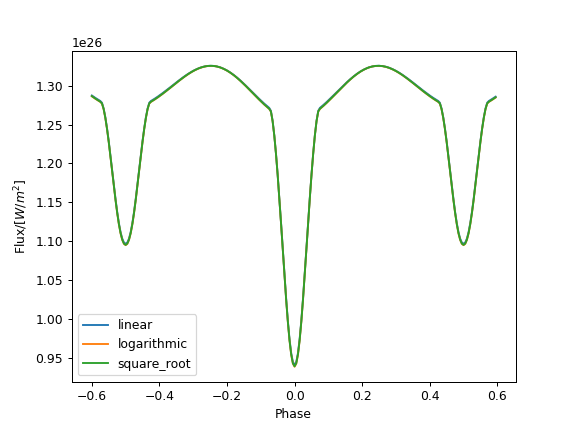

2020-01-23 09:25:45,315 - 3743 - observer.observer - INFO: observation is running
2020-01-23 09:25:48,618 - 3743 - observer.observer - INFO: observation finished
2020-01-23 09:25:48,621 - 3743 - observer.observer - INFO: observation is running
2020-01-23 09:25:51,870 - 3743 - observer.observer - INFO: observation finished
2020-01-23 09:25:51,872 - 3743 - observer.observer - INFO: observation is running
2020-01-23 09:25:55,049 - 3743 - observer.observer - INFO: observation finished


In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for ld_law in available_ld_laws:
    config.LIMB_DARKENING_LAW = ld_law
    
    phase, flux = observer.lc(
        from_phase=-0.6,
        to_phase=0.6,
        phase_step=0.005
    )
    
    ax1.plot(phase, flux['Generic.Bessell.V'], label=ld_law)

ax1.legend()
ax1.set_xlabel('Phase')
ax1.set_ylabel(r'Flux/$[W/ m^2]$')
plt.show()    

In the second example we can change the number of reflection number iterations in calculation of the reflection effect in order to get the idea how  much iterations we need to achieve desired precision (reflection effect can be simply turned of with parameter `REFLECTION_EFFECT` which accepts `bool` values which can save a lot of comutational time in case of very wide binaries):

<IPython.core.display.Javascript object>


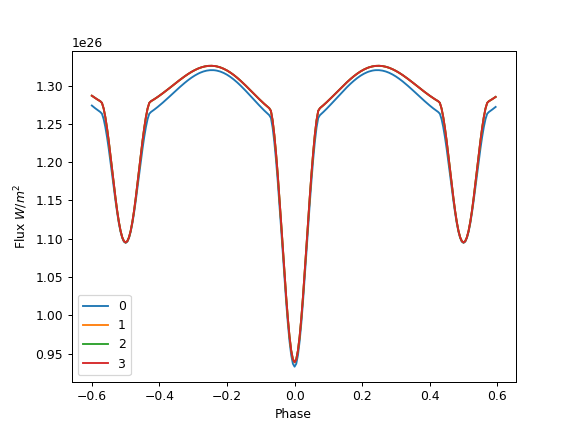

2020-01-22 16:46:57,501 - 17567 - observer.observer - INFO: observation is running
2020-01-22 16:47:00,274 - 17567 - observer.observer - INFO: observation finished
2020-01-22 16:47:00,277 - 17567 - observer.observer - INFO: observation is running
2020-01-22 16:47:03,436 - 17567 - observer.observer - INFO: observation finished
2020-01-22 16:47:03,438 - 17567 - observer.observer - INFO: observation is running
2020-01-22 16:47:06,586 - 17567 - observer.observer - INFO: observation finished
2020-01-22 16:47:06,589 - 17567 - observer.observer - INFO: observation is running
2020-01-22 16:47:09,659 - 17567 - observer.observer - INFO: observation finished


In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
for iterations in range(4):
    config.REFLECTION_EFFECT_ITERATIONS = iterations
    
    phase, flux = observer.lc(
        from_phase=-0.6,
        to_phase=0.6,
        phase_step=0.005
    )
    
    ax1.plot(phase, flux['Generic.Bessell.V'], label=iterations)

ax1.legend()
ax1.set_xlabel('Phase')
ax1.set_ylabel(r'Flux/$[W/ m^2]$')
plt.show()